In [40]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.columns = [col.replace(" (cm)", "") for col in df.columns]

In [9]:
df

,sepal length,sepal width,petal length,petal width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
target_name     0
dtype: int64

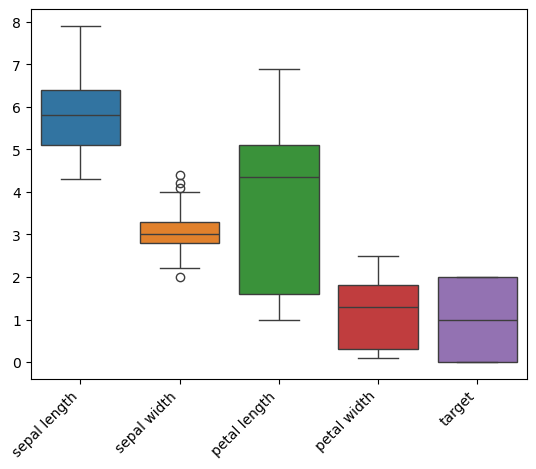

In [11]:
sns.boxplot(df)
plt.xticks(rotation=45, ha='right') 
plt.show()

In [12]:
Q1 = df["sepal width"].quantile(0.25)
Q3 = df["sepal width"].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out rows with outlier values
data = df[df["sepal width"] <= upper_bound ]
data= data[data["sepal width"] >= lower_bound ]

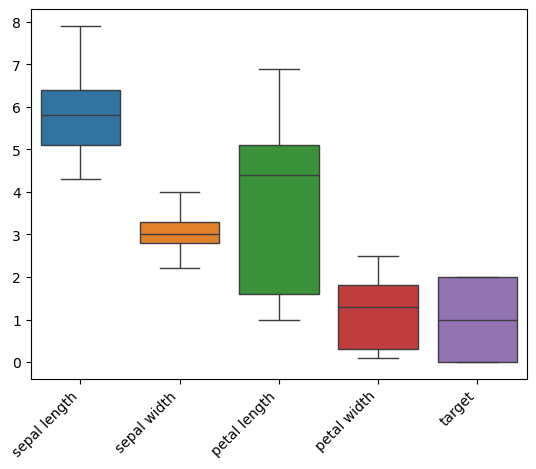

In [13]:
sns.boxplot(data)
plt.xticks(rotation=45, ha='right') 
plt.show()

In [14]:
corr_matrix = data[['sepal length', 'sepal width', 'petal length', 'petal width', 'target']].corr()
corr_matrix

,sepal length,sepal width,petal length,petal width,target
sepal length,1.000000,-0.123144,0.879362,0.822587,0.788053
sepal width,-0.123144,1.000000,-0.406141,-0.340602,-0.405380
petal length,0.879362,-0.406141,1.000000,0.961866,0.947460
petal width,0.822587,-0.340602,0.961866,1.000000,0.955638
target,0.788053,-0.405380,0.947460,0.955638,1.000000


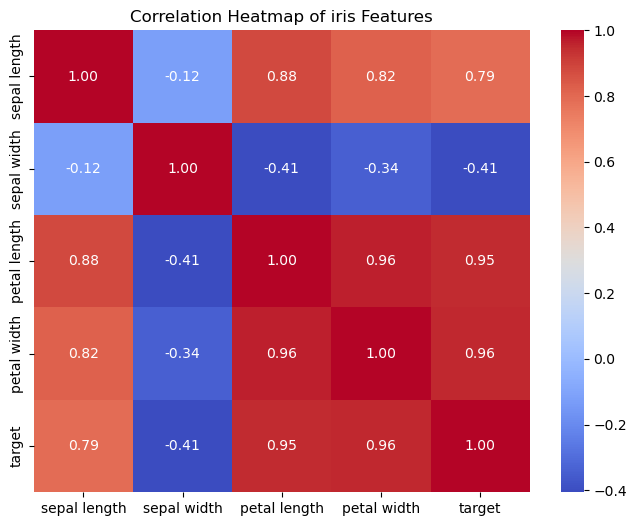

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix , annot=True ,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap of iris Features")
plt.show()

In [16]:
x=data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=data['target']

In [17]:
X_new = SelectKBest(score_func=f_classif,k=2).fit_transform(x,y)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,
                                                 random_state=42) 

In [19]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=200)

In [20]:
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [22]:
svc= SVC(kernel="linear")
rfe= RFE(estimator=svc , n_features_to_select=2)
X_rfe=rfe.fit_transform(x,y)
print("Selected features:", rfe.support_)

Selected features: [False False  True  True]


In [23]:
model_SVC = SVC(kernel='rbf',gamma='auto') 

In [24]:
x_train,x_test,Y_train,Y_test = train_test_split(X_rfe,y,test_size=0.2,
                                                 random_state=42) 


In [25]:
model_SVC.fit(x_train,Y_train)
Y_pred = model.predict(x_test)

In [26]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=iris.target_names))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [27]:
Model=KNeighborsClassifier(n_neighbors=3)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,
                                                 random_state=42) 

In [29]:
Model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = Model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [32]:
modeL=RandomForestClassifier(n_estimators=100,random_state=42)

In [33]:
modeL.fit(x, y)


RandomForestClassifier(random_state=42)

In [34]:
# Get feature importances
importances = modeL.feature_importances_
feature_names = x.columns


        Feature  Importance
3   petal width    0.444665
2  petal length    0.412439
0  sepal length    0.120819
1   sepal width    0.022078


C:\Users\SONY\AppData\Local\Temp\ipykernel_7588\385851155.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


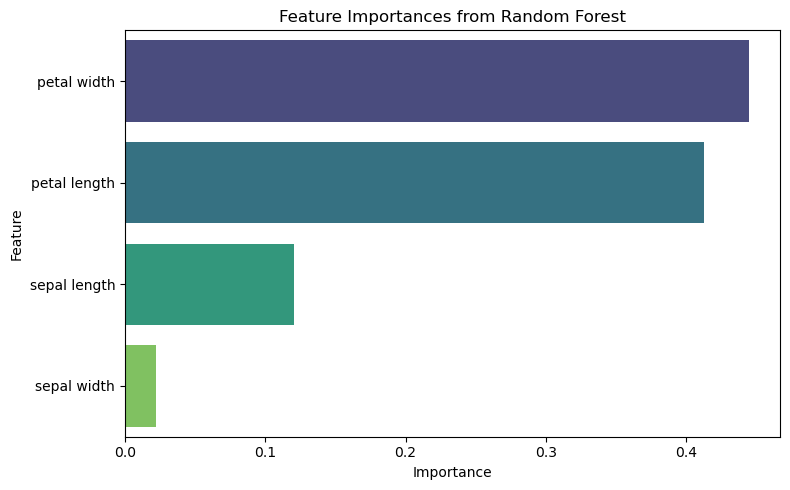

In [35]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# 2. Train the model
modeL = RandomForestClassifier(n_estimators=100, random_state=42)
modeL.fit(x_train, y_train)

# 3. Predict on test data
y_pred = modeL.predict(x_test)

# 4. Evaluate
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Optional: Confusion matrix and detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


In [37]:
model = XGBClassifier()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Accuracy and evaluation
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\SONY\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [01:11:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


C:\Users\SONY\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [01:39:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


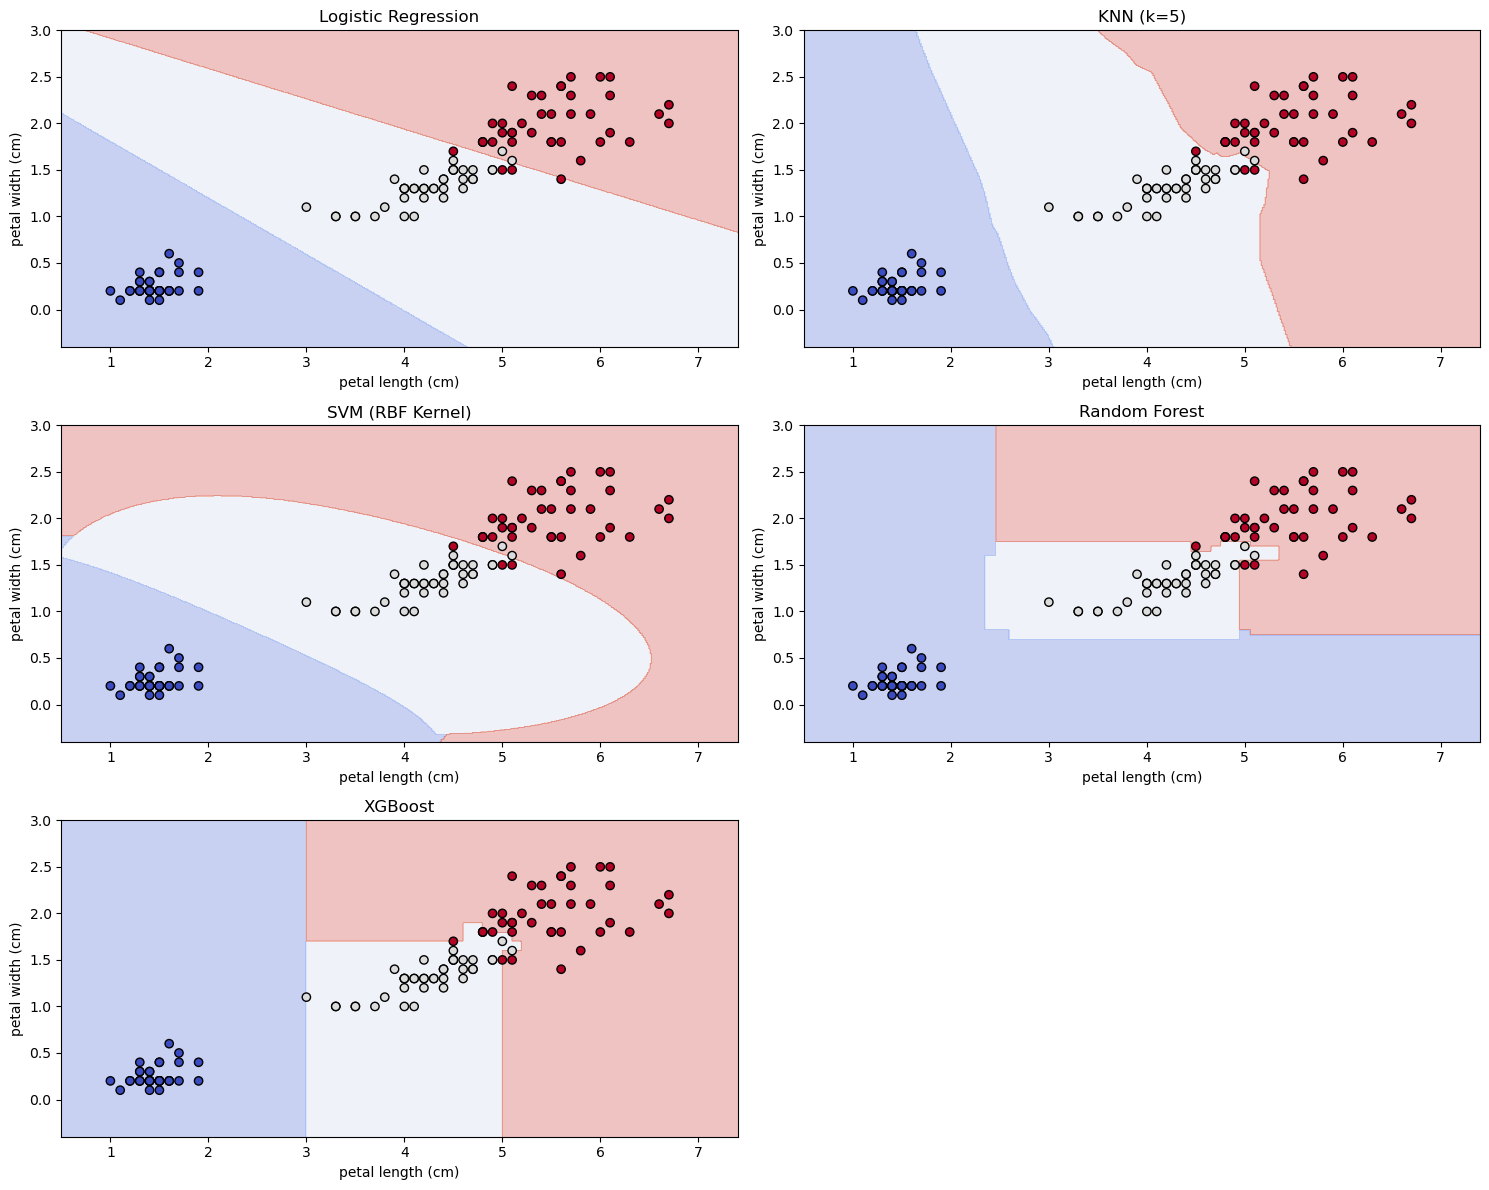

In [54]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Use only 2 features for visualization
x = data[['petal length (cm)', 'petal width (cm)']].values
y = data['target'].values
feature_names = ['petal length (cm)', 'petal width (cm)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers including XGBoost
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='auto'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Meshgrid for plotting
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Plot all classifiers
plt.figure(figsize=(15, 12))
for i, (name, clf) in enumerate(classifiers.items(), 1):
    if "SVM" in name or "Logistic" in name:
        clf.fit(X_train_scaled, y_train)
        Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:
        clf.fit(X_train, y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.subplot(3, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(name)

plt.tight_layout()
plt.show()